Packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from __future__ import print_function
import keras
import glob
from keras.datasets import cifar10
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from keras.applications import ResNet50, ResNet152V2, DenseNet121
from keras.layers import Dense, Dropout, Activation, Input, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D,BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras import regularizers
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, optimizers, callbacks
from tensorflow.keras.utils import to_categorical


In [3]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from mlxtend.plotting import plot_confusion_matrix

In [4]:
from imutils import paths
import random
import shutil
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2
from PIL import Image
import os
from keras.preprocessing.image import img_to_array
from keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from google.colab.patches import cv2_imshow
import glob

from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import classification_report

In [5]:
source_dir_real = '/content/drive/MyDrive/real'
source_dir_fake = '/content/drive/MyDrive/fake'
destination_dir_real = '/content/drive/MyDrive/Dataset_final/Real1'
destination_dir_fake = '/content/drive/MyDrive/Dataset_final/Fake1'
dataset_root = '/content/drive/MyDrive/Dataset_final'

#############################  Dont run the below cells every time  ###############################################

#############################  Run from here  ###############################################

In [6]:
import glob
import os

# Define the output directory
output_dir_real = '/content/drive/MyDrive/genuine'
output_dir_fake = '/content/drive/MyDrive/forgerd'

# Get the paths of JPEG files in the output directories
real_image_files = glob.glob(os.path.join(output_dir_real, "*.png")) + glob.glob(os.path.join(output_dir_real, "*.PNG"))
fake_image_files = glob.glob(os.path.join(output_dir_fake, "*.png")) + glob.glob(os.path.join(output_dir_fake, "*.PNG"))

# Count the number of images
num_real_images = len(real_image_files)
num_fake_images = len(fake_image_files)

print("Number of images in output_dir_real:", num_real_images)
print("Number of images in output_dir_fake:", num_fake_images)


Number of images in output_dir_real: 887
Number of images in output_dir_fake: 785


In [7]:
# Later, when you need to load the frames:
X_images_real = []
X_images_fake = []

# Resize function
def resize_image(image, target_size=(128, 128)):
    return cv2.resize(image, target_size)

# Load frames for real videos
for file_path in glob.glob(os.path.join(output_dir_real, "*.png")) + glob.glob(os.path.join(output_dir_real, "*.PNG")):
    frame = cv2.imread(file_path)
    frame_resized = resize_image(frame)
    X_images_real.append(frame_resized)

# Load frames for fake videos
for file_path in glob.glob(os.path.join(output_dir_fake, "*.png")) + glob.glob(os.path.join(output_dir_fake, "*.PNG")):
    frame = cv2.imread(file_path)
    frame_resized = resize_image(frame)
    X_images_fake.append(frame_resized)

# Convert lists to numpy arrays
X_images_real = np.array(X_images_real)
X_images_fake = np.array(X_images_fake)

# Check the shapes of the arrays
print("X_images_real shape:", X_images_real.shape)
print("X_images_fake shape:", X_images_fake.shape)

X_images_real shape: (887, 128, 128, 3)
X_images_fake shape: (785, 128, 128, 3)


In [8]:
print(X_images_real)

[[[[253 253 245]
   [253 253 245]
   [253 253 245]
   ...
   [253 253 245]
   [252 253 244]
   [253 253 245]]

  [[253 253 245]
   [253 253 245]
   [253 253 245]
   ...
   [253 253 245]
   [253 253 245]
   [253 253 245]]

  [[253 253 245]
   [253 253 245]
   [253 253 245]
   ...
   [253 253 245]
   [253 253 245]
   [252 253 245]]

  ...

  [[253 253 245]
   [253 253 245]
   [253 253 245]
   ...
   [252 252 244]
   [253 253 245]
   [253 253 245]]

  [[253 253 245]
   [251 253 244]
   [253 253 245]
   ...
   [253 253 245]
   [253 253 245]
   [254 252 242]]

  [[253 253 245]
   [253 253 245]
   [253 253 245]
   ...
   [253 253 245]
   [253 253 245]
   [253 253 245]]]


 [[[253 253 245]
   [253 253 245]
   [253 253 245]
   ...
   [250 253 247]
   [253 253 245]
   [253 253 245]]

  [[251 253 244]
   [253 253 245]
   [253 253 245]
   ...
   [252 253 243]
   [253 253 245]
   [253 253 245]]

  [[253 253 245]
   [253 253 245]
   [253 253 245]
   ...
   [253 251 246]
   [253 253 245]
   [253 253

###Data Labelling

In [9]:
# Define labels for real and fake frames
y_real = np.zeros(len(X_images_real))
y_fake = np.ones(len(X_images_fake))

###Train-Test-Validation Split

In [10]:
from sklearn.model_selection import train_test_split

# Concatenate the data and labels
X_images = np.concatenate((X_images_real, X_images_fake), axis=0)
y = np.concatenate((y_real, y_fake), axis=0)

# Split the data into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_images, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Check the sizes of each set
print("Train set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))


Train set size: 1002
Validation set size: 335
Test set size: 335


#Model Training

##VGG16


In [11]:
# Resize images to match the input shape of the model
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_val_resized = np.array([cv2.resize(img, (224, 224)) for img in X_val])
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])

# Load the pre-trained VGG16 model without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the pre-trained model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 3s 0us/step


In [12]:
# Define callbacks for model checkpoints and early stopping
checkpoint = ModelCheckpoint("vgg_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

# Assuming 'early_stopping' is also desired to be used in the training, include it in the callbacks list
history = model.fit(X_train_resized, y_train, batch_size=32, epochs=40, validation_data=(X_val_resized, y_val), callbacks=[checkpoint])

# Get training loss, accuracy, and validation loss, accuracy
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_resized, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/40
32/32 [==============================] - ETA: 0s - loss: 0.6551 - accuracy: 0.7146
Epoch 1: val_loss improved from inf to 0.33927, saving model to vgg_model.h5
32/32 [==============================] - 22s 376ms/step - loss: 0.6551 - accuracy: 0.7146 - val_loss: 0.3393 - val_accuracy: 0.8567
Epoch 2/40


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - ETA: 0s - loss: 0.2922 - accuracy: 0.8772
Epoch 2: val_loss improved from 0.33927 to 0.24366, saving model to vgg_model.h5
32/32 [==============================] - 5s 164ms/step - loss: 0.2922 - accuracy: 0.8772 - val_loss: 0.2437 - val_accuracy: 0.9224
Epoch 3/40
32/32 [==============================] - ETA: 0s - loss: 0.1868 - accuracy: 0.9291
Epoch 3: val_loss improved from 0.24366 to 0.20717, saving model to vgg_model.h5
32/32 [==============================] - 5s 165ms/step - loss: 0.1868 - accuracy: 0.9291 - val_loss: 0.2072 - val_accuracy: 0.9284
Epoch 4/40
32/32 [==============================] - ETA: 0s - loss: 0.1420 - accuracy: 0.9551
Epoch 4: val_loss improved from 0.20717 to 0.20654, saving model to vgg_model.h5
32/32 [==============================] - 5s 169ms/step - loss: 0.1420 - accuracy: 0.9551 - val_loss: 0.2065 - val_accuracy: 0.9164
Epoch 5/40
32/32 [==============================] - ETA: 0s - loss: 0.1117 - accuracy: 0.9641

####Plots

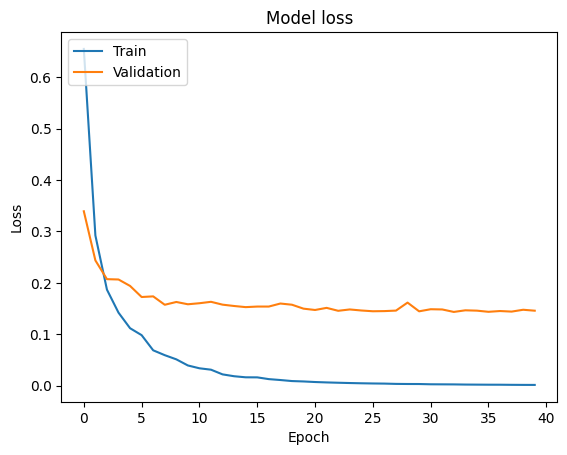

In [13]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

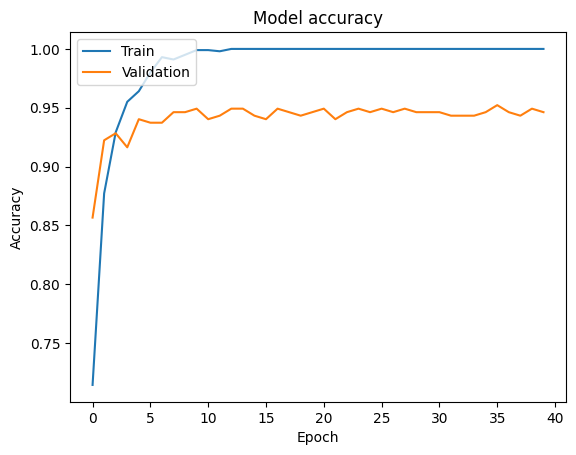

In [14]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

11/11 [==============================] - 1s 127ms/step


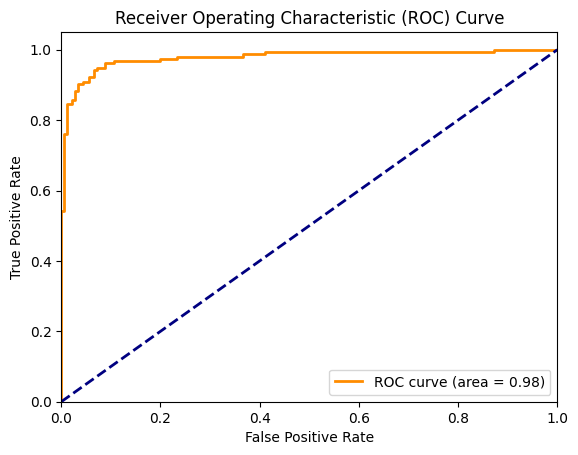

In [15]:
# Generate ROC curve
y_pred_prob = model.predict(X_test_resized).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

####Classification report

In [16]:
# Generate predictions
y_pred_prob = model.predict(X_test_resized)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred, target_names=['Real', 'Fake']))

11/11 [==============================] - 1s 128ms/step
              precision    recall  f1-score   support

        Real       0.92      0.97      0.94       180
        Fake       0.96      0.90      0.93       155

    accuracy                           0.94       335
   macro avg       0.94      0.93      0.94       335
weighted avg       0.94      0.94      0.94       335



In [17]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_resized, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Predict on the test set
y_pred = model.predict(X_test_resized)

# Convert predicted probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary, average='weighted')
recall = recall_score(y_test, y_pred_binary, average='weighted')
f1 = f1_score(y_test, y_pred_binary, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


11/11 [==============================] - 1s 124ms/step - loss: 0.2334 - accuracy: 0.9373
Test Loss: 0.23344196379184723
Test Accuracy: 0.937313437461853
11/11 [==============================] - 1s 126ms/step
Precision: 0.93834156030026
Recall: 0.9373134328358209
F1 Score: 0.9371407285749357


###VGG16 (without early stopping)

In [18]:
# Define callbacks for model checkpoints and early stopping
checkpoint = ModelCheckpoint("vgg_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

# Assuming 'early_stopping' is also desired to be used in the training, include it in the callbacks list
history = model.fit(X_train_resized, y_train, batch_size=32, epochs=40, validation_data=(X_val_resized, y_val), callbacks=[checkpoint, early_stopping])

# Get training loss, accuracy, and validation loss, accuracy
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_resized, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/40
32/32 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 1: val_loss improved from inf to 0.14928, saving model to vgg_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - 6s 184ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1493 - val_accuracy: 0.9493
Epoch 2/40
32/32 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 1.0000
Epoch 2: val_loss improved from 0.14928 to 0.14926, saving model to vgg_model.h5
32/32 [==============================] - 7s 217ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.1493 - val_accuracy: 0.9493
Epoch 3/40
32/32 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 1.0000
Epoch 3: val_loss improved from 0.14926 to 0.14580, saving model to vgg_model.h5
32/32 [==============================] - 6s 177ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1458 - val_accuracy: 0.9493
Epoch 4/40
32/32 [==============================] - ETA: 0s - loss: 0.0011 - accuracy: 1.0000
Epoch 4: val_loss did not improve from 0.14580
32/32 [==============================] - 5s 173ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.1459 - val_ac

####Plots

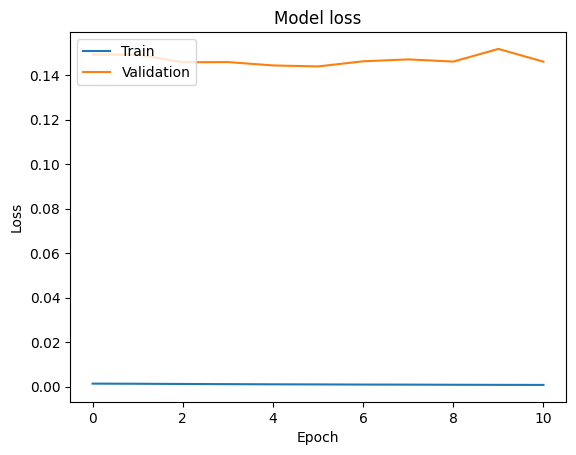

In [19]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

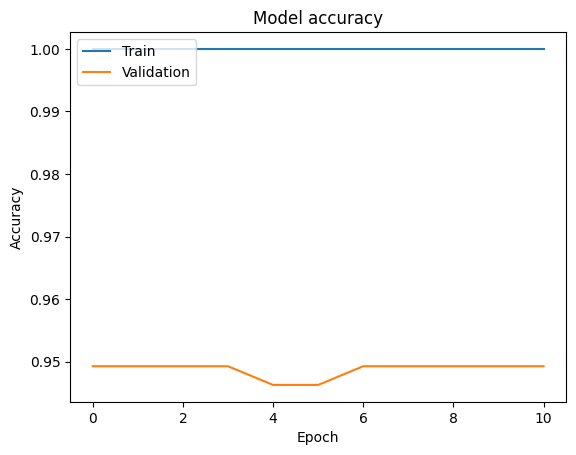

In [20]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

11/11 [==============================] - 1s 125ms/step


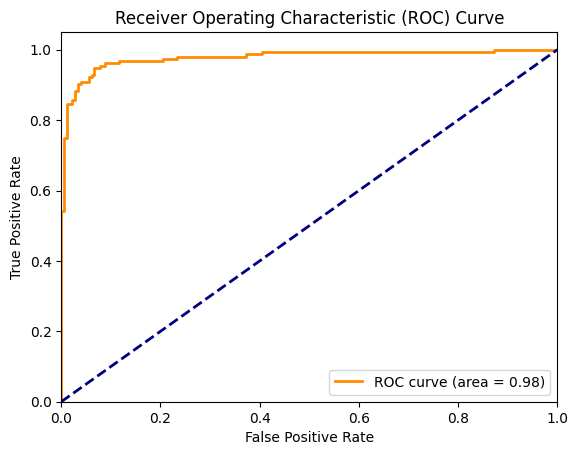

In [21]:
# Generate ROC curve
y_pred_prob = model.predict(X_test_resized).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

####Classification Report

In [22]:
# Generate predictions
y_pred_prob = model.predict(X_test_resized)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred, target_names=['Real', 'Fake']))

11/11 [==============================] - 1s 127ms/step
              precision    recall  f1-score   support

        Real       0.92      0.97      0.94       180
        Fake       0.96      0.90      0.93       155

    accuracy                           0.94       335
   macro avg       0.94      0.93      0.94       335
weighted avg       0.94      0.94      0.94       335



In [23]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_resized, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Predict on the test set
y_pred = model.predict(X_test_resized)

# Convert predicted probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary, average='weighted')
recall = recall_score(y_test, y_pred_binary, average='weighted')
f1 = f1_score(y_test, y_pred_binary, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


11/11 [==============================] - 1s 125ms/step - loss: 0.2390 - accuracy: 0.9373
Test Loss: 0.2389632910490036
Test Accuracy: 0.937313437461853
11/11 [==============================] - 1s 127ms/step
Precision: 0.93834156030026
Recall: 0.9373134328358209
F1 Score: 0.9371407285749357


##Xception

In [24]:
# Resize images to match the input shape of the model
X_train_resized = np.array([cv2.resize(img, (71, 71)) for img in X_train])
X_val_resized = np.array([cv2.resize(img, (71, 71)) for img in X_val])
X_test_resized = np.array([cv2.resize(img, (71, 71)) for img in X_test])

# Load the pre-trained Xception model without the top classification layer
base_model = Xception(weights='imagenet', include_top=False, input_shape=(71, 71, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the pre-trained model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

83683744/83683744 [==============================] - 5s 0us/step


In [25]:
# Define callbacks for model checkpoints and early stopping
checkpoint = ModelCheckpoint("xception_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, batch_size=32, epochs=40, validation_data=(X_val_resized, y_val), callbacks=[checkpoint, early_stopping])

# Get training loss, accuracy, and validation loss, accuracy
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_resized, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Epoch 1/40
32/32 [==============================] - ETA: 0s - loss: 12.4938 - accuracy: 0.5319
Epoch 1: val_loss improved from inf to 8.97690, saving model to xception_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - 9s 125ms/step - loss: 12.4938 - accuracy: 0.5319 - val_loss: 8.9769 - val_accuracy: 0.5254
Epoch 2/40
31/32 [============================>.] - ETA: 0s - loss: 3.9044 - accuracy: 0.5554
Epoch 2: val_loss improved from 8.97690 to 1.28006, saving model to xception_model.h5
32/32 [==============================] - 1s 44ms/step - loss: 3.8929 - accuracy: 0.5549 - val_loss: 1.2801 - val_accuracy: 0.6836
Epoch 3/40
31/32 [============================>.] - ETA: 0s - loss: 1.9076 - accuracy: 0.5927
Epoch 3: val_loss improved from 1.28006 to 1.12263, saving model to xception_model.h5
32/32 [==============================] - 1s 45ms/step - loss: 1.8981 - accuracy: 0.5938 - val_loss: 1.1226 - val_accuracy: 0.6657
Epoch 4/40
31/32 [============================>.] - ETA: 0s - loss: 1.1718 - accuracy: 0.6583
Epoch 4: val_loss did not improve from 1.12263
32/32 [==============================] - 1s 32ms/step - loss: 1.1685 - accuracy: 0.6597 - val_loss: 2.9097 

####Plots

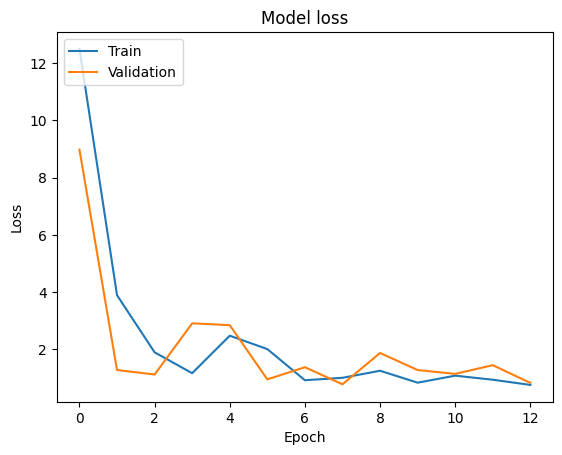

In [26]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

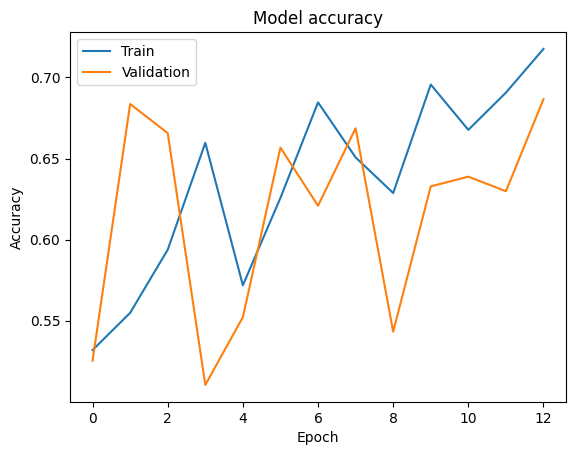

In [27]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

11/11 [==============================] - 1s 19ms/step


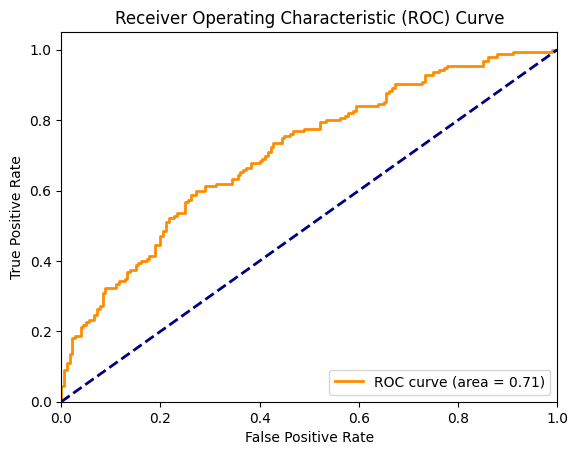

In [28]:
# Generate ROC curve
y_pred_prob = model.predict(X_test_resized).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

####Classification Report

In [29]:
# Generate predictions
y_pred_prob = model.predict(X_test_resized)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred, target_names=['Real', 'Fake']))

11/11 [==============================] - 0s 20ms/step
              precision    recall  f1-score   support

        Real       0.66      0.76      0.70       180
        Fake       0.66      0.54      0.59       155

    accuracy                           0.66       335
   macro avg       0.66      0.65      0.65       335
weighted avg       0.66      0.66      0.65       335



In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_resized, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Predict on the test set
y_pred = model.predict(X_test_resized)

# Convert predicted probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary, average='weighted')
recall = recall_score(y_test, y_pred_binary, average='weighted')
f1 = f1_score(y_test, y_pred_binary, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

11/11 [==============================] - 0s 20ms/step - loss: 0.8499 - accuracy: 0.6567
Test Loss: 0.8498917818069458
Test Accuracy: 0.6567164063453674
11/11 [==============================] - 0s 19ms/step
Precision: 0.6569958364930871
Recall: 0.6567164179104478
F1 Score: 0.6517984139990385


##Efficient Net

In [31]:
# Resize images to match the input shape of the model
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_val_resized = np.array([cv2.resize(img, (224, 224)) for img in X_val])
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])

# Load the pre-trained EfficientNetB0 model without the top classification layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the pre-trained model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

16705208/16705208 [==============================] - 2s 0us/step


In [32]:
# Define callbacks for model checkpoints and early stopping
checkpoint = ModelCheckpoint("efficientnet_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, batch_size=32, epochs=50, validation_data=(X_val_resized, y_val), callbacks=[checkpoint, early_stopping])

# Get training loss, accuracy, and validation loss, accuracy
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_resized, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/50
32/32 [==============================] - ETA: 0s - loss: 0.5979 - accuracy: 0.6697
Epoch 1: val_loss improved from inf to 0.47356, saving model to efficientnet_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - 16s 253ms/step - loss: 0.5979 - accuracy: 0.6697 - val_loss: 0.4736 - val_accuracy: 0.7940
Epoch 2/50
31/32 [============================>.] - ETA: 0s - loss: 0.4510 - accuracy: 0.7974
Epoch 2: val_loss improved from 0.47356 to 0.37428, saving model to efficientnet_model.h5
32/32 [==============================] - 3s 93ms/step - loss: 0.4494 - accuracy: 0.7984 - val_loss: 0.3743 - val_accuracy: 0.8388
Epoch 3/50
31/32 [============================>.] - ETA: 0s - loss: 0.3639 - accuracy: 0.8538
Epoch 3: val_loss improved from 0.37428 to 0.29655, saving model to efficientnet_model.h5
32/32 [==============================] - 3s 93ms/step - loss: 0.3624 - accuracy: 0.8553 - val_loss: 0.2966 - val_accuracy: 0.8985
Epoch 4/50
31/32 [============================>.] - ETA: 0s - loss: 0.2875 - accuracy: 0.8871
Epoch 4: val_loss improved from 0.29655 to 0.26550, saving model to efficientnet_model.h5
32/32 [==============================] - 3s 102ms/step -

####Plots

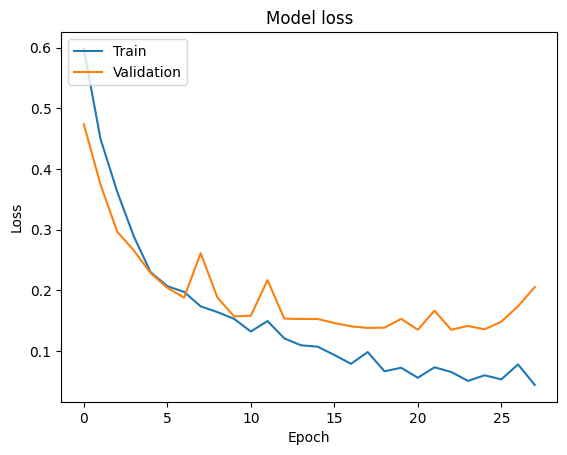

In [33]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

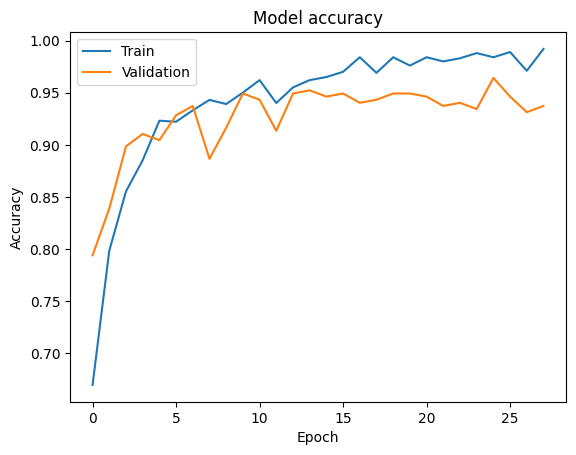

In [34]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

11/11 [==============================] - 2s 60ms/step


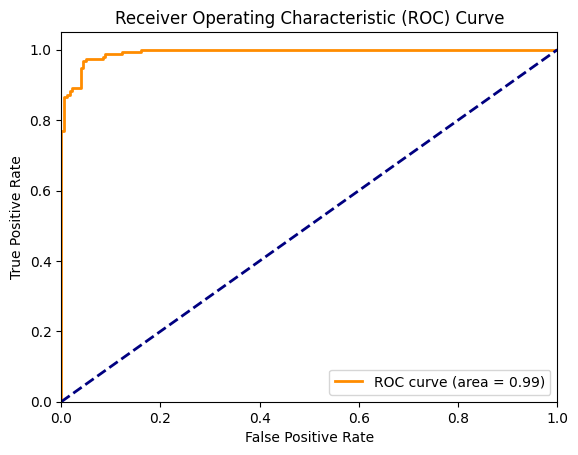

In [35]:
# Generate ROC curve
y_pred_prob = model.predict(X_test_resized).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

####Classification Report

In [36]:
# Generate predictions
y_pred_prob = model.predict(X_test_resized)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred, target_names=['Real', 'Fake']))

11/11 [==============================] - 1s 55ms/step
              precision    recall  f1-score   support

        Real       0.94      0.96      0.95       180
        Fake       0.95      0.93      0.94       155

    accuracy                           0.95       335
   macro avg       0.95      0.95      0.95       335
weighted avg       0.95      0.95      0.95       335



In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_resized, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Predict on the test set
y_pred = model.predict(X_test_resized)

# Convert predicted probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary, average='weighted')
recall = recall_score(y_test, y_pred_binary, average='weighted')
f1 = f1_score(y_test, y_pred_binary, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

11/11 [==============================] - 1s 59ms/step - loss: 0.1190 - accuracy: 0.9463
Test Loss: 0.11899637430906296
Test Accuracy: 0.9462686777114868
11/11 [==============================] - 1s 55ms/step
Precision: 0.9464289551379298
Recall: 0.9462686567164179
F1 Score: 0.9462126986270971


##NASNetLarge

In [38]:
# Resize images to match the input shape of the model
X_train_resized = np.array([cv2.resize(img, (331, 331)) for img in X_train])
X_val_resized = np.array([cv2.resize(img, (331, 331)) for img in X_val])
X_test_resized = np.array([cv2.resize(img, (331, 331)) for img in X_test])

# Load the pre-trained NASNetLarge model without the top classification layer
base_model = NASNetLarge(weights='imagenet', include_top=False, input_shape=(331, 331, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the pre-trained model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

343610240/343610240 [==============================] - 16s 0us/step


In [39]:
# Define callbacks for model checkpoints and early stopping
checkpoint = ModelCheckpoint("nasnet_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, batch_size=32, epochs=50, validation_data=(X_val_resized, y_val), callbacks=[checkpoint, early_stopping])

# Get training loss, accuracy, and validation loss, accuracy
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_resized, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/50
32/32 [==============================] - ETA: 0s - loss: 0.7823 - accuracy: 0.5519
Epoch 1: val_loss improved from inf to 0.68291, saving model to nasnet_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - 84s 2s/step - loss: 0.7823 - accuracy: 0.5519 - val_loss: 0.6829 - val_accuracy: 0.5254
Epoch 2/50
32/32 [==============================] - ETA: 0s - loss: 0.7108 - accuracy: 0.5339
Epoch 2: val_loss improved from 0.68291 to 0.68104, saving model to nasnet_model.h5
32/32 [==============================] - 40s 1s/step - loss: 0.7108 - accuracy: 0.5339 - val_loss: 0.6810 - val_accuracy: 0.5254
Epoch 3/50
32/32 [==============================] - ETA: 0s - loss: 0.6683 - accuracy: 0.5958
Epoch 3: val_loss improved from 0.68104 to 0.63697, saving model to nasnet_model.h5
32/32 [==============================] - 41s 1s/step - loss: 0.6683 - accuracy: 0.5958 - val_loss: 0.6370 - val_accuracy: 0.6418
Epoch 4/50
32/32 [==============================] - ETA: 0s - loss: 0.6440 - accuracy: 0.6148
Epoch 4: val_loss improved from 0.63697 to 0.63662, saving model to nasnet_model.h5
32/32 [==============================] - 44s 1s/step - loss: 0.6440 - accuracy:

####Plots

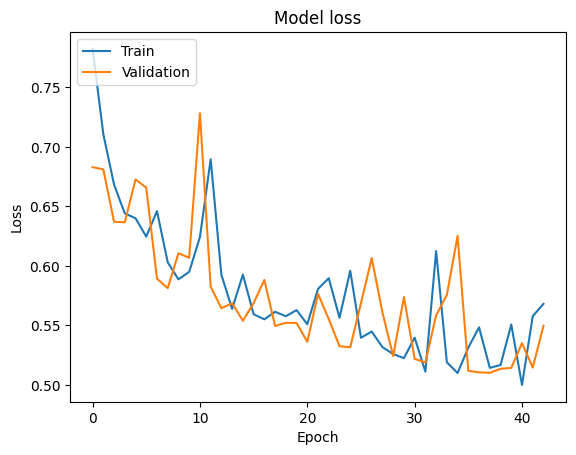

In [40]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

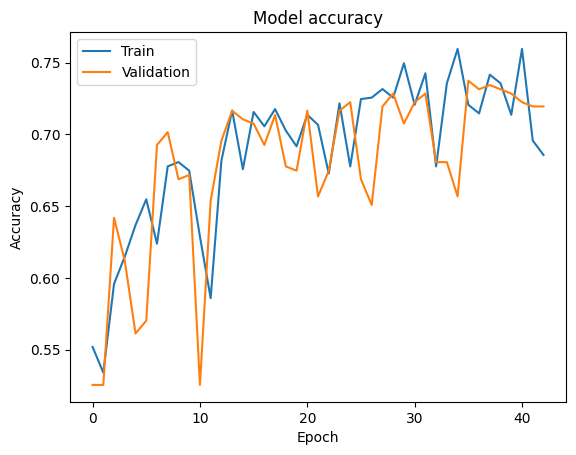

In [41]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

11/11 [==============================] - 15s 824ms/step


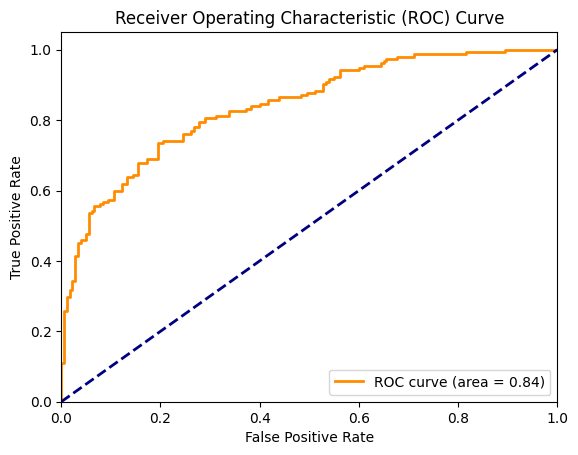

In [42]:
# Generate ROC curve
y_pred_prob = model.predict(X_test_resized).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

####Classification Report

In [43]:
# Generate predictions
y_pred_prob = model.predict(X_test_resized)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred, target_names=['Real', 'Fake']))

11/11 [==============================] - 9s 832ms/step
              precision    recall  f1-score   support

        Real       0.76      0.83      0.79       180
        Fake       0.78      0.69      0.73       155

    accuracy                           0.76       335
   macro avg       0.77      0.76      0.76       335
weighted avg       0.77      0.76      0.76       335



In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_resized, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Predict on the test set
y_pred = model.predict(X_test_resized)

# Convert predicted probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary, average='weighted')
recall = recall_score(y_test, y_pred_binary, average='weighted')
f1 = f1_score(y_test, y_pred_binary, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

11/11 [==============================] - 9s 825ms/step - loss: 0.4939 - accuracy: 0.7642
Test Loss: 0.4938861131668091
Test Accuracy: 0.7641791105270386
11/11 [==============================] - 9s 837ms/step
Precision: 0.765144153432792
Recall: 0.764179104477612
F1 Score: 0.7626548007015916


##InceptionV3 (GoogleNet)

In [45]:
# Resize images to match the input shape of the model
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_val_resized = np.array([cv2.resize(img, (224, 224)) for img in X_val])
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])

# Load the pre-trained InceptionV3 model without the top classification layer
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the pre-trained model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

87910968/87910968 [==============================] - 5s 0us/step


In [46]:
# Define callbacks for model checkpoints and early stopping
checkpoint = ModelCheckpoint("inception_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, batch_size=32, epochs=50, validation_data=(X_val_resized, y_val), callbacks=[checkpoint, early_stopping])

# Get training loss, accuracy, and validation loss, accuracy
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_resized, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/50
32/32 [==============================] - ETA: 0s - loss: 10.5363 - accuracy: 0.6277
Epoch 1: val_loss improved from inf to 1.78545, saving model to inception_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - 16s 290ms/step - loss: 10.5363 - accuracy: 0.6277 - val_loss: 1.7854 - val_accuracy: 0.7403
Epoch 2/50
31/32 [============================>.] - ETA: 0s - loss: 2.2216 - accuracy: 0.7409
Epoch 2: val_loss improved from 1.78545 to 1.47216, saving model to inception_model.h5
32/32 [==============================] - 4s 130ms/step - loss: 2.2102 - accuracy: 0.7415 - val_loss: 1.4722 - val_accuracy: 0.7731
Epoch 3/50
31/32 [============================>.] - ETA: 0s - loss: 1.1479 - accuracy: 0.7692
Epoch 3: val_loss did not improve from 1.47216
32/32 [==============================] - 3s 93ms/step - loss: 1.1684 - accuracy: 0.7685 - val_loss: 1.6932 - val_accuracy: 0.7582
Epoch 4/50
31/32 [============================>.] - ETA: 0s - loss: 0.9615 - accuracy: 0.7964
Epoch 4: val_loss improved from 1.47216 to 0.73989, saving model to inception_model.h5
32/32 [==============================] - 4s 133ms/step - loss: 0.9591 - accuracy: 0.7974 - val_loss: 0.

####Plots

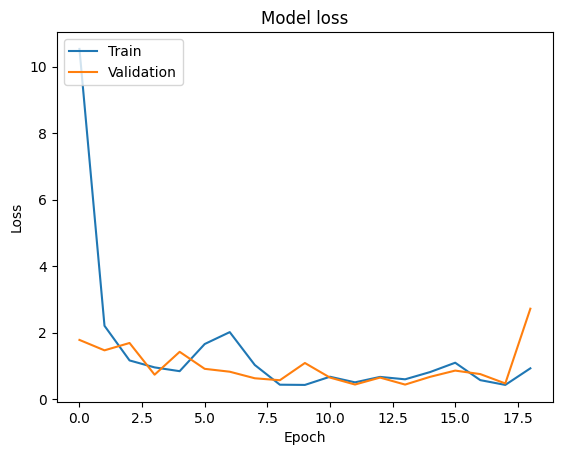

In [47]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

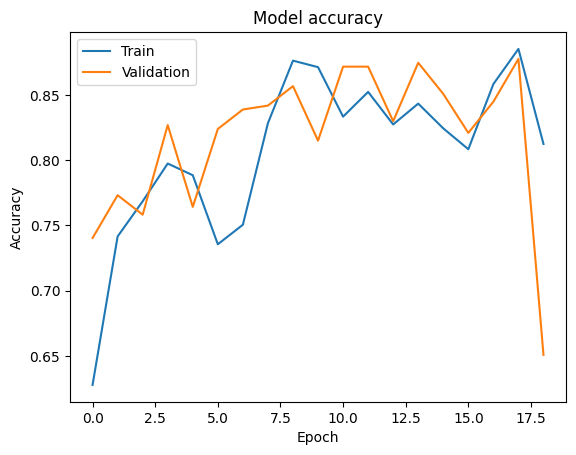

In [48]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

11/11 [==============================] - 2s 70ms/step


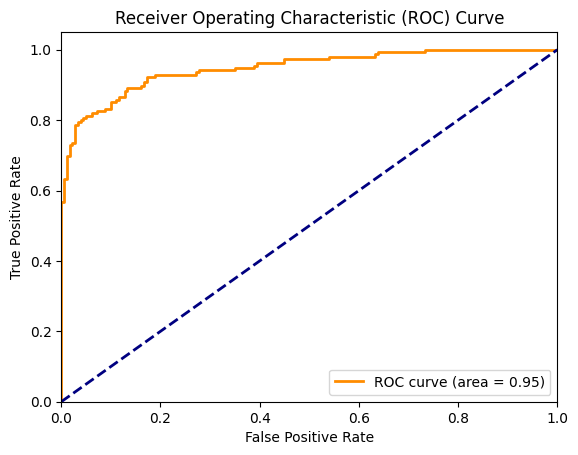

In [49]:
# Generate ROC curve
y_pred_prob = model.predict(X_test_resized).ravel()
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

####Classification Report

In [50]:
# Generate predictions
y_pred_prob = model.predict(X_test_resized)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred, target_names=['Real', 'Fake']))

11/11 [==============================] - 1s 61ms/step
              precision    recall  f1-score   support

        Real       0.90      0.86      0.88       180
        Fake       0.85      0.89      0.87       155

    accuracy                           0.87       335
   macro avg       0.87      0.88      0.87       335
weighted avg       0.88      0.87      0.87       335



In [51]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_resized, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Predict on the test set
y_pred = model.predict(X_test_resized)

# Convert predicted probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary, average='weighted')
recall = recall_score(y_test, y_pred_binary, average='weighted')
f1 = f1_score(y_test, y_pred_binary, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

11/11 [==============================] - 1s 63ms/step - loss: 0.4312 - accuracy: 0.8746
Test Loss: 0.43115711212158203
Test Accuracy: 0.874626874923706
11/11 [==============================] - 1s 61ms/step
Precision: 0.8759292423600361
Recall: 0.8746268656716418
F1 Score: 0.8747791915209545


##ConvNeXt (2022)

In [52]:
from tensorflow.keras import models, layers

def ConvNeXt(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(512, (3, 3), activation='relu'),
        layers.Conv2D(512, (3, 3), activation='relu'),
        layers.Conv2D(512, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(1024, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

# Instantiate the ConvNeXt model with larger input size
input_shape = (128, 128, 3)
num_classes = 10  # Adjust this based on your task
model = ConvNeXt(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Print model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_98 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 conv2d_99 (Conv2D)          (None, 124, 124, 64)      36928     
                                                                 
 conv2d_100 (Conv2D)         (None, 122, 122, 64)      36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_101 (Conv2D)         (None, 59, 59, 128)       73856     
                                                                 
 conv2d_102 (Conv2D)         (None, 57, 57, 128)       147584    
                                                        

In [53]:
# Define callbacks for model checkpoints and early stopping
checkpoint = ModelCheckpoint("convnext_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

# Resize input data to match the expected input shape of the model
X_train_resized = np.array([cv2.resize(img, (128, 128)) for img in X_train])
X_val_resized = np.array([cv2.resize(img, (128, 128)) for img in X_val])
X_test_resized = np.array([cv2.resize(img, (128, 128)) for img in X_test])

# Train the model on the resized training data
history = model.fit(X_train_resized, y_train, epochs=50, batch_size=32,
                    validation_data=(X_val_resized, y_val),
                    callbacks=[checkpoint, early_stopping])

# Get training loss, accuracy, and validation loss, accuracy
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_resized, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/50
32/32 [==============================] - ETA: 0s - loss: 1.9119 - accuracy: 0.4760
Epoch 1: val_loss improved from inf to 0.70590, saving model to convnext_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - 23s 333ms/step - loss: 1.9119 - accuracy: 0.4760 - val_loss: 0.7059 - val_accuracy: 0.4746
Epoch 2/50
32/32 [==============================] - ETA: 0s - loss: 0.7174 - accuracy: 0.5080
Epoch 2: val_loss improved from 0.70590 to 0.69541, saving model to convnext_model.h5
32/32 [==============================] - 5s 164ms/step - loss: 0.7174 - accuracy: 0.5080 - val_loss: 0.6954 - val_accuracy: 0.6627
Epoch 3/50
32/32 [==============================] - ETA: 0s - loss: 0.7188 - accuracy: 0.4950
Epoch 3: val_loss did not improve from 0.69541
32/32 [==============================] - 5s 147ms/step - loss: 0.7188 - accuracy: 0.4950 - val_loss: 0.6999 - val_accuracy: 0.5254
Epoch 4/50
32/32 [==============================] - ETA: 0s - loss: 0.7153 - accuracy: 0.4750
Epoch 4: val_loss did not improve from 0.69541
32/32 [==============================] - 5s 147ms/step - loss: 0.7153 - accuracy: 0.4750 - val_loss: 0.6959 - val_accuracy: 0.5254
Epoch 5/50
32

####Plots

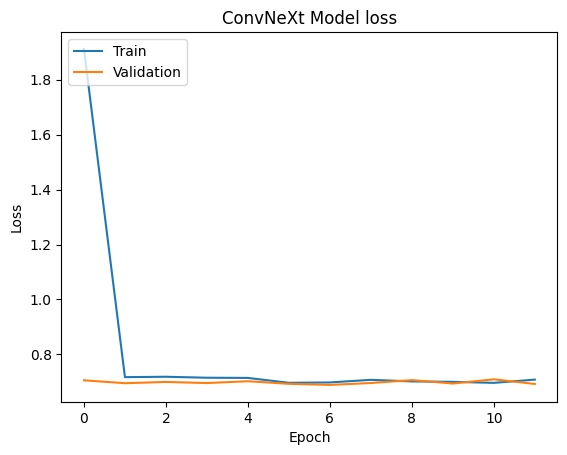

In [54]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('ConvNeXt Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

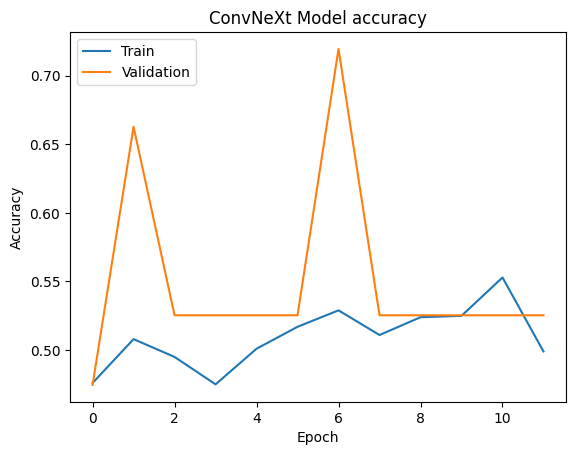

In [55]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ConvNeXt Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

####Classification Report

In [56]:
# Generate the classification report
y_pred = np.argmax(y_pred_prob, axis=1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.54      1.00      0.70       180
         1.0       0.00      0.00      0.00       155

    accuracy                           0.54       335
   macro avg       0.27      0.50      0.35       335
weighted avg       0.29      0.54      0.38       335



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_resized, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Convert predicted probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_binary, average='weighted')
recall = recall_score(y_test, y_pred_binary, average='weighted')
f1 = f1_score(y_test, y_pred_binary, average='weighted')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


11/11 [==============================] - 0s 37ms/step - loss: 0.6882 - accuracy: 0.7284
Test Loss: 0.6882156729698181
Test Accuracy: 0.7283582091331482
Precision: 0.2887057251058142
Recall: 0.5373134328358209
F1 Score: 0.3755977394580496


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##EfficientNet with Self attention mechanism between the dense layers - 1 and 2


In [58]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dot, Activation, Reshape, Permute, Multiply
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import cv2
import tensorflow as tf

# Load the pre-trained EfficientNetB0 model without the top classification layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the pre-trained model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)  # First dense layer with 1024 neurons

# Self-attention mechanism
att_weights = Dense(1024, activation='softmax')(x)
att_weights = Dot(axes=1)([x, att_weights])
x = Multiply()([x, att_weights])

x = Dense(512, activation='relu')(x)   # Second dense layer with 512 neurons
x = Dense(128, activation='relu')(x)   # Third dense layer with 128 neurons
output = Dense(1, activation='sigmoid')(x)  # Output layer with sigmoid activation for binary classification

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

# Resize images to match the input shape of the model
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_val_resized = np.array([cv2.resize(img, (224, 224)) for img in X_val])
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])

# Define callbacks for model checkpoints and early stopping
checkpoint = ModelCheckpoint("efficientnet_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, batch_size=32, epochs=50, validation_data=(X_val_resized, y_val), callbacks=[checkpoint, early_stopping])

# Get training loss, accuracy, and validation loss, accuracy
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_resized, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_6 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_2 (Rescaling)     (None, 224, 224, 3)          0         ['input_6[0][0]']             
                                                                                                  
 normalization_1 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_2[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_3 (Rescaling)     (None, 224, 224, 3)          0         ['normalization_1[0][0]'

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - 15s 214ms/step - loss: 0.6467 - accuracy: 0.6507 - val_loss: 0.4652 - val_accuracy: 0.7612
Epoch 2/50
31/32 [============================>.] - ETA: 0s - loss: 0.4479 - accuracy: 0.8034
Epoch 2: val_loss improved from 0.46522 to 0.31545, saving model to efficientnet_model.h5
32/32 [==============================] - 3s 99ms/step - loss: 0.4507 - accuracy: 0.8024 - val_loss: 0.3155 - val_accuracy: 0.8985
Epoch 3/50
31/32 [============================>.] - ETA: 0s - loss: 0.3204 - accuracy: 0.8639
Epoch 3: val_loss improved from 0.31545 to 0.26480, saving model to efficientnet_model.h5
32/32 [==============================] - 3s 98ms/step - loss: 0.3203 - accuracy: 0.8633 - val_loss: 0.2648 - val_accuracy: 0.9045
Epoch 4/50
31/32 [============================>.] - ETA: 0s - loss: 0.2266 - accuracy: 0.9012
Epoch 4: val_loss improved from 0.26480 to 0.16814, saving model to efficientnet_model.h5
32/32 [==============================] - 3s 94ms/step - 

####Classification Report

In [59]:
# Generate predictions

# Resize images to match the input shape of the model
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])

y_pred_prob = model.predict(X_test_resized)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred, target_names=['Real', 'Fake']))

11/11 [==============================] - 2s 58ms/step
              precision    recall  f1-score   support

        Real       0.91      0.93      0.92       180
        Fake       0.91      0.90      0.91       155

    accuracy                           0.91       335
   macro avg       0.91      0.91      0.91       335
weighted avg       0.91      0.91      0.91       335



In [60]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions on the test set
test_preds = model.predict(X_test_resized)

# Convert probabilities to binary predictions (0 or 1)
test_preds_binary = (test_preds > 0.5).astype(int)

# Calculate precision
precision_test = precision_score(y_test, test_preds_binary, average='weighted')

# Calculate recall
recall_test = recall_score(y_test, test_preds_binary, average='weighted')

# Calculate F1-score
f1_test = f1_score(y_test, test_preds_binary, average='weighted')

# Print Accuracy, precision, recall, and F1-score for the test set
print("Test Accuracy (v2):", accuracy)
print("Precision for test data:", precision_test)
print("Recall for test data:", recall_test)
print("F1-score for test data:", f1_test)

11/11 [==============================] - 1s 54ms/step
Test Accuracy (v2): 0.9134328365325928
Precision for test data: 0.9134498989092501
Recall for test data: 0.9134328358208955
F1-score for test data: 0.9133675847751309


##EfficientNet with Self attention mechanism between the dense layers - 2 and 3


In [61]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dot, Activation, Reshape, Permute, Multiply
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import cv2
import tensorflow as tf

# Load the pre-trained EfficientNetB0 model without the top classification layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the pre-trained model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)  # First dense layer with 1024 neurons
x = Dense(512, activation='relu')(x)   # Second dense layer with 512 neurons

# Self-attention mechanism
att_weights = Dense(512, activation='softmax')(x)
att_weights = Dot(axes=1)([x, att_weights])
x = Multiply()([x, att_weights])

x = Dense(128, activation='relu')(x)   # Third dense layer with 128 neurons
output = Dense(1, activation='sigmoid')(x)  # Output layer with sigmoid activation for binary classification

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

# Resize images to match the input shape of the model
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_val_resized = np.array([cv2.resize(img, (224, 224)) for img in X_val])
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])

# Define callbacks for model checkpoints and early stopping
checkpoint = ModelCheckpoint("efficientnet_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, batch_size=32, epochs=50, validation_data=(X_val_resized, y_val), callbacks=[checkpoint, early_stopping])

# Get training loss, accuracy, and validation loss, accuracy
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_resized, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_4 (Rescaling)     (None, 224, 224, 3)          0         ['input_7[0][0]']             
                                                                                                  
 normalization_2 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_4[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_5 (Rescaling)     (None, 224, 224, 3)          0         ['normalization_2[0][0]'

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - 13s 191ms/step - loss: 0.6380 - accuracy: 0.6188 - val_loss: 0.5547 - val_accuracy: 0.6866
Epoch 2/50
31/32 [============================>.] - ETA: 0s - loss: 0.4718 - accuracy: 0.7893
Epoch 2: val_loss improved from 0.55469 to 0.53225, saving model to efficientnet_model.h5
32/32 [==============================] - 3s 96ms/step - loss: 0.4714 - accuracy: 0.7904 - val_loss: 0.5323 - val_accuracy: 0.6418
Epoch 3/50
31/32 [============================>.] - ETA: 0s - loss: 0.3793 - accuracy: 0.8196
Epoch 3: val_loss improved from 0.53225 to 0.26970, saving model to efficientnet_model.h5
32/32 [==============================] - 3s 96ms/step - loss: 0.3842 - accuracy: 0.8184 - val_loss: 0.2697 - val_accuracy: 0.9015
Epoch 4/50
31/32 [============================>.] - ETA: 0s - loss: 0.3326 - accuracy: 0.8760
Epoch 4: val_loss did not improve from 0.26970
32/32 [==============================] - 3s 80ms/step - loss: 0.3323 - accuracy: 0.8752 - val_loss:

In [62]:
# Generate predictions

# Resize images to match the input shape of the model
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])

y_pred_prob = model.predict(X_test_resized)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred, target_names=['Real', 'Fake']))

11/11 [==============================] - 2s 54ms/step
              precision    recall  f1-score   support

        Real       0.91      0.96      0.93       180
        Fake       0.95      0.88      0.92       155

    accuracy                           0.93       335
   macro avg       0.93      0.92      0.92       335
weighted avg       0.93      0.93      0.93       335



In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions on the test set
test_preds = model.predict(X_test_resized)

# Convert probabilities to binary predictions (0 or 1)
test_preds_binary = (test_preds > 0.5).astype(int)

# Calculate precision
precision_test = precision_score(y_test, test_preds_binary, average='weighted')

# Calculate recall
recall_test = recall_score(y_test, test_preds_binary, average='weighted')

# Calculate F1-score
f1_test = f1_score(y_test, test_preds_binary, average='weighted')

# Print Accuracy, precision, recall, and F1-score for the test set
print("Test Accuracy (v2):", accuracy)
print("Precision for test data:", precision_test)
print("Recall for test data:", recall_test)
print("F1-score for test data:", f1_test)

11/11 [==============================] - 1s 54ms/step
Test Accuracy (v2): 0.9253731369972229
Precision for test data: 0.9268714238580222
Recall for test data: 0.9253731343283582
F1-score for test data: 0.9251067275383756


##EfficientNet with Self attention mechanism between the dense layers - 1 and 2 and 2 and 3


In [64]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dot, Activation, Reshape, Permute, Multiply
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import cv2
import tensorflow as tf

# Load the pre-trained EfficientNetB0 model without the top classification layer
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom classification layers on top of the pre-trained model
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)  # First dense layer with 1024 neurons

# Self-attention mechanism
att_weights = Dense(1024, activation='softmax')(x)
att_weights = Dot(axes=1)([x, att_weights])
x = Multiply()([x, att_weights])

x = Dense(512, activation='relu')(x)   # Second dense layer with 512 neurons

# Self-attention mechanism
att_weights = Dense(512, activation='softmax')(x)
att_weights = Dot(axes=1)([x, att_weights])
x = Multiply()([x, att_weights])

x = Dense(128, activation='relu')(x)   # Third dense layer with 128 neurons
output = Dense(1, activation='sigmoid')(x)  # Output layer with sigmoid activation for binary classification

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

# Resize images to match the input shape of the model
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_val_resized = np.array([cv2.resize(img, (224, 224)) for img in X_val])
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])

# Define callbacks for model checkpoints and early stopping
checkpoint = ModelCheckpoint("efficientnet_model.h5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min', restore_best_weights=True)

# Train the model
history = model.fit(X_train_resized, y_train, batch_size=32, epochs=50, validation_data=(X_val_resized, y_val), callbacks=[checkpoint, early_stopping])

# Get training loss, accuracy, and validation loss, accuracy
train_loss = history.history['loss'][-1]
train_accuracy = history.history['accuracy'][-1]
val_loss = history.history['val_loss'][-1]
val_accuracy = history.history['val_accuracy'][-1]

print("Train Loss:", train_loss)
print("Train Accuracy:", train_accuracy)
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_resized, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling_6 (Rescaling)     (None, 224, 224, 3)          0         ['input_8[0][0]']             
                                                                                                  
 normalization_3 (Normaliza  (None, 224, 224, 3)          7         ['rescaling_6[0][0]']         
 tion)                                                                                            
                                                                                                  
 rescaling_7 (Rescaling)     (None, 224, 224, 3)          0         ['normalization_3[0][0]'

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


32/32 [==============================] - 14s 160ms/step - loss: 0.6900 - accuracy: 0.5160 - val_loss: 0.6694 - val_accuracy: 0.5254
Epoch 2/50
31/32 [============================>.] - ETA: 0s - loss: 0.6717 - accuracy: 0.5272
Epoch 2: val_loss improved from 0.66937 to 0.66875, saving model to efficientnet_model.h5
32/32 [==============================] - 3s 101ms/step - loss: 0.6704 - accuracy: 0.5299 - val_loss: 0.6687 - val_accuracy: 0.5254
Epoch 3/50
31/32 [============================>.] - ETA: 0s - loss: 0.6154 - accuracy: 0.5655
Epoch 3: val_loss improved from 0.66875 to 0.59053, saving model to efficientnet_model.h5
32/32 [==============================] - 3s 101ms/step - loss: 0.6155 - accuracy: 0.5659 - val_loss: 0.5905 - val_accuracy: 0.7522
Epoch 4/50
31/32 [============================>.] - ETA: 0s - loss: 0.7156 - accuracy: 0.6986
Epoch 4: val_loss did not improve from 0.59053
32/32 [==============================] - 3s 85ms/step - loss: 0.7157 - accuracy: 0.6986 - val_los

####Classification Report

In [65]:
# Generate predictions

# Resize images to match the input shape of the model
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])

y_pred_prob = model.predict(X_test_resized)
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred, target_names=['Real', 'Fake']))

11/11 [==============================] - 3s 61ms/step
              precision    recall  f1-score   support

        Real       0.73      0.94      0.82       180
        Fake       0.89      0.59      0.71       155

    accuracy                           0.78       335
   macro avg       0.81      0.76      0.76       335
weighted avg       0.80      0.78      0.77       335



In [66]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions on the test set
test_preds = model.predict(X_test_resized)

# Convert probabilities to binary predictions (0 or 1)
test_preds_binary = (test_preds > 0.5).astype(int)

# Calculate precision
precision_test = precision_score(y_test, test_preds_binary, average='weighted')

# Calculate recall
recall_test = recall_score(y_test, test_preds_binary, average='weighted')

# Calculate F1-score
f1_test = f1_score(y_test, test_preds_binary, average='weighted')

# Print Accuracy, precision, recall, and F1-score for the test set
print("Test Accuracy (v2):", accuracy)
print("Precision for test data:", precision_test)
print("Recall for test data:", recall_test)
print("F1-score for test data:", f1_test)

11/11 [==============================] - 1s 54ms/step
Test Accuracy (v2): 0.7761194109916687
Precision for test data: 0.8025141899691143
Recall for test data: 0.7761194029850746
F1-score for test data: 0.7673996586067506


In [67]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 10.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.9/315.9 kB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 45.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 12.0 MB/

In [68]:
pip install gradio --upgrade


In [69]:
import numpy as np
import gradio as gr
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
from keras.models import load_model

# Load the model
model_path = "/content/vgg_model.h5"
model = load_model(model_path)

# Function to preprocess the image and make predictions
def predict_signature(img):
    # Convert image to numpy array
    img_array = image.img_to_array(img)
    # Resize image to 224x224 (ResNet50 input size)
    img_array = image.smart_resize(img_array, (224, 224))
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Preprocess the input image
    img_array = preprocess_input(img_array)
    # Make prediction
    prediction = model.predict(img_array)
    # Decode prediction
    if prediction[0][0] > 0.5:
        return "Fraudulent Signature"
    else:
        return "Genuine Signature"

# Create Gradio interface
iface = gr.Interface(fn=predict_signature, inputs="image", outputs="label", title="Signature Verification", description="Upload an image of a signature and the model will predict whether it's genuine or fraudulent.")
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://02be51843e3c7d0f70.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [70]:
import numpy as np
import gradio as gr
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
from keras.models import load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Load the model
model_path = "/content/vgg_model.h5"
model = load_model(model_path)

# Function to preprocess the image and make predictions
def predict_signature(image1, image2):
    # Preprocess image 1
    img_array1 = image.img_to_array(image1)
    img_array1 = image.smart_resize(img_array1, (224, 224))
    img_array1 = np.expand_dims(img_array1, axis=0)
    img_array1 = preprocess_input(img_array1)

    # Preprocess image 2
    img_array2 = image.img_to_array(image2)
    img_array2 = image.smart_resize(img_array2, (224, 224))
    img_array2 = np.expand_dims(img_array2, axis=0)
    img_array2 = preprocess_input(img_array2)

    # Make predictions for both images
    prediction1 = model.predict(img_array1)
    prediction2 = model.predict(img_array2)

    # Decode predictions
    if prediction1[0][0] > 0.5:
        prediction1 = "Fraudulent"
    else:
        prediction1 = "Genuine"

    if prediction2[0][0] > 0.5:
        prediction2 = "Fraudulent"
    else:
        prediction2 = "Genuine"

    return prediction1, prediction2

# Create Gradio interface
iface = gr.Interface(fn=predict_signature, inputs=["image", "image"], outputs=["label", "label"],
                     title="Signature Verification",
                     description="Upload two images of signatures, and the model will predict if they are genuine or fraudulent.")
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://4cd1ad3f7c88959782.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [71]:
####running
import numpy as np
import gradio as gr
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input
from keras.models import load_model

# Load the model
model_path = "/content/vgg_model.h5"
model = load_model(model_path)

# Function to preprocess the image and make predictions
def predict_signature(image1, image2):
    # Preprocess image 1
    img_array1 = image.img_to_array(image1)
    img_array1 = image.smart_resize(img_array1, (224, 224))
    img_array1 = np.expand_dims(img_array1, axis=0)
    img_array1 = preprocess_input(img_array1)

    # Preprocess image 2
    img_array2 = image.img_to_array(image2)
    img_array2 = image.smart_resize(img_array2, (224, 224))
    img_array2 = np.expand_dims(img_array2, axis=0)
    img_array2 = preprocess_input(img_array2)

    # Make predictions for both images
    prediction1 = model.predict(img_array1)
    prediction2 = model.predict(img_array2)

    # Decode predictions
    if prediction1[0][0] > 0.5 and prediction2[0][0] > 0.5:
        return "Original"
    else:
        return "Fake"

# Create Gradio interface
iface = gr.Interface(fn=predict_signature, inputs=["image", "image"], outputs="label",
                     title="Signature Verification",
                     description="Upload two images of signatures, and the model will predict if they are both original or fake.")
iface.launch()


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://0887b460ffcf12aa34.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
